# Colorization Dataset Analysis (EDA)

## Color Distribution Analysis

In [9]:
import os
from PIL import Image
import torch
import torchvision.transforms as T
import kornia.color as kc
import matplotlib.pyplot as plt
from tqdm import tqdm

rgb_dir = './data_subset/train'
resolution=256
bins=100

transform = T.Compose([
    T.Resize((resolution, resolution)),
    T.ToTensor()
])

a_values = []
b_values = []
saturation_values = []

filenames = [
    f for f in os.listdir(rgb_dir)
    if f.lower().endswith(('.jpg', '.jpeg', '.png'))
]

print(f"Found {len(filenames)} images in {rgb_dir}")

for fname in tqdm(filenames, desc="Processing images"):
    img_path = os.path.join(rgb_dir, fname)
    img = Image.open(img_path).convert('RGB')
    img_t = transform(img).unsqueeze(0)  # (1, 3, H, W)
    
    lab = kc.rgb_to_lab(img_t)[0]  # (3, H, W)
    a = lab[1, :, :] / 110.0
    b = lab[2, :, :] / 110.0
    saturation = torch.sqrt(a**2 + b**2)
    
    a_values.append(a.flatten().cpu())
    b_values.append(b.flatten().cpu())
    saturation_values.append(saturation.flatten().cpu())

all_a = torch.cat(a_values).numpy()
all_b = torch.cat(b_values).numpy()
all_sat = torch.cat(saturation_values).numpy()


Found 25000 images in ./data_subset/train


Processing images: 100%|██████████| 25000/25000 [07:51<00:00, 53.05it/s] 


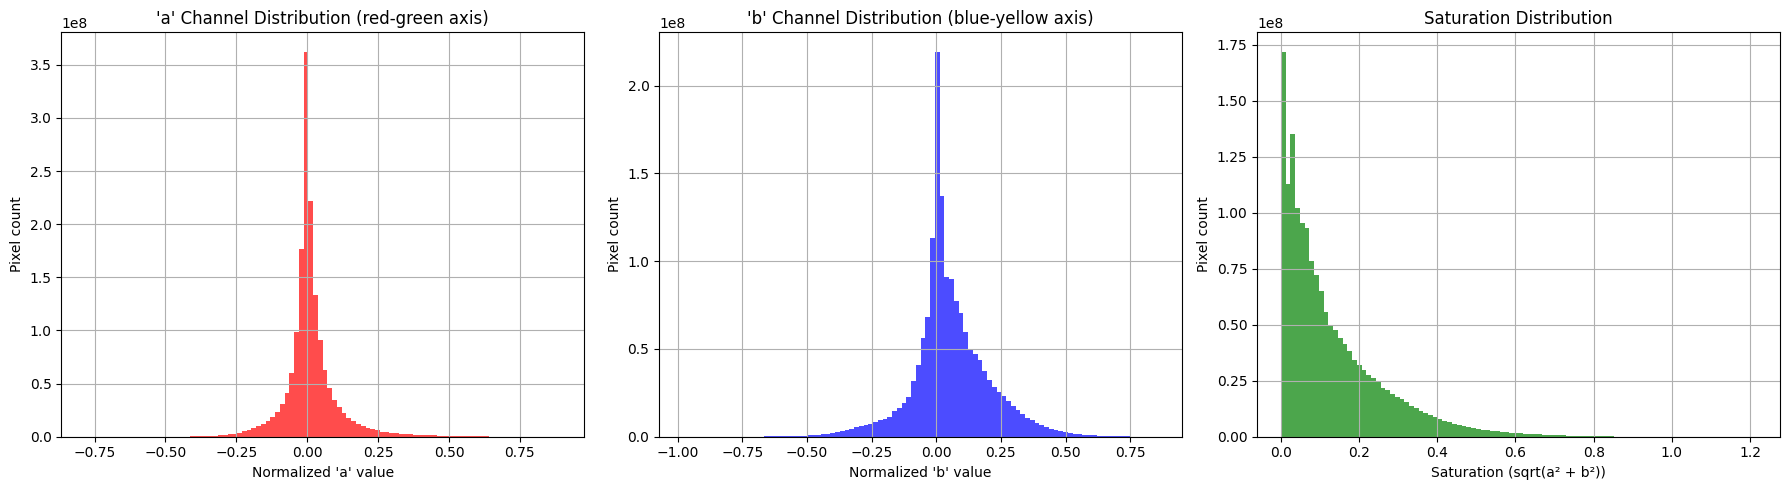

In [10]:
# Plot 'a', 'b', and saturation histograms side-by-side
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.hist(all_a, bins=bins, color='red', alpha=0.7)
plt.title(f"'a' Channel Distribution (red-green axis)")
plt.xlabel("Normalized 'a' value")
plt.ylabel("Pixel count")
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(all_b, bins=bins, color='blue', alpha=0.7)
plt.title(f"'b' Channel Distribution (blue-yellow axis)")
plt.xlabel("Normalized 'b' value")
plt.ylabel("Pixel count")
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(all_sat, bins=bins, color='green', alpha=0.7)
plt.title(f"Saturation Distribution")
plt.xlabel("Saturation (sqrt(a² + b²))")
plt.ylabel("Pixel count")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
mean_a = all_a.mean().item()
std_a = all_a.std().item()
mean_b = all_b.mean().item()
std_b = all_b.std().item()

print(f"Mean a: {mean_a:.4f}, Std a: {std_a:.4f}")
print(f"Mean b: {mean_b:.4f}, Std b: {std_b:.4f}")

(mean_a, std_a), (mean_b, std_b)

Mean a: 0.0125, Std a: 0.0952
Mean b: 0.0529, Std b: 0.1521


((0.012453772127628326, 0.09521061927080154),
 (0.05290934443473816, 0.1520530879497528))